In [119]:
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  
import warnings
#warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [11]:
raw_full_join = pd.read_csv("full_join.csv")

In [183]:
full_join = raw_full_join.copy()
full_join = full_join.rename(columns={
'COMPAGNIE AERIENNE':'COMPAGNIE_CODE',
})

In [136]:
print(full_join.shape)
full_join.head(1) #(3000000, 47)

(3000000, 53)


,IDENTIFIANT,VOL,CODE_AVION,AEROPORT_DEPART,AEROPORT_ARRIVEE,HEURE_DEPART_PROGRAMME,HEURE_DEPART,TEMPS_RETARD_DEPART,TEMPS_DEPLACEMENT_DECOLLAGE,HEURE_DECOLLAGE,TEMPS_PROGRAMME,TEMPS_PASSE,TEMPS_VOL,DISTANCE,HEURE_ATTERRISSAGE,TEMPS_DEPLACEMENT_ATTERRISSAGE,HEURE_ARRIVEE_PROGRAMMEE,HEURE_ARRIVEE,TEMPS_RETARD_ARRIVEE,DETOURNEMENT,ANNULATION,RAISON_ANNULATION,RETARD_SYSTEM,RETARD_SECURITE,RETARD_COMPAGNIE,RETARD_AVION,RETARD_METEO,NIVEAU_SECURITE,COMPAGNIE_CODE,COMPAGNIE,DEPART_NOM,DEPART_LIEU,DEPART_PAYS,DEPART_LONGITUDE,DEPART_LATITUDE,DEPART_HAUTEUR,DEPART_PRIX_RETARD_10,DEPART_PRIX_RETARD_APRES,ARRIVEE_NOM,ARRIVEE_LIEU,ARRIVEE_PAYS,ARRIVEE_LONGITUDE,ARRIVEE_LATITUDE,ARRIVEE_HAUTEUR,ARRIVEE_PRIX_RETARD_10,ARRIVEE_PRIX_RETARD_APRES,year,month,day,weekday,week,PRIX_RETARD_DEPART,PRIX_RETARD_ARRIVE
0,651373,2317,28fa5df4d7,TIA,DSS,1410,1411.0,1.0,20.0,1431.0,229.0,227.0,197.0,1749,2048.0,10.0,2059,2058.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,10,NVPPA,Ne Va Pas Partout Airlines,Tirana International Airport Mother Teresa,Tirana,AL,19.7206,41.4147,126.0,4582,586,Tirana International Airport Mother Teresa,Tirana,AL,19.7206,41.4147,126.0,4582,586,2016,4,10,6,14,4582.0,0.0


In [184]:
def _encode_dates(X):
    X_encoded = X.copy()
    X_encoded.loc[:, 'DATE'] = pd.to_datetime(X_encoded['DATE'], format="%d/%m/%Y", errors="coerce")
    X_encoded.loc[:, 'year'] = X_encoded['DATE'].dt.year
    X_encoded.loc[:, 'month'] = X_encoded['DATE'].dt.month
    X_encoded.loc[:, 'day'] = X_encoded['DATE'].dt.day
    X_encoded.loc[:, 'weekday'] = X_encoded['DATE'].dt.weekday
    X_encoded.loc[:, 'week'] = X_encoded['DATE'].dt.week
    return X_encoded.drop(columns=["DATE"])

#date_encoder = FunctionTransformer(_encode_dates)
#date_encoder.fit_transform(vols).head()
full_join = _encode_dates(full_join)
full_join.head()

,IDENTIFIANT,VOL,CODE_AVION,AEROPORT_DEPART,AEROPORT_ARRIVEE,HEURE_DEPART_PROGRAMME,HEURE_DEPART,TEMPS_RETARD_DEPART,TEMPS_DEPLACEMENT_DECOLLAGE,HEURE_DECOLLAGE,TEMPS_PROGRAMME,TEMPS_PASSE,TEMPS_VOL,DISTANCE,HEURE_ATTERRISSAGE,TEMPS_DEPLACEMENT_ATTERRISSAGE,HEURE_ARRIVEE_PROGRAMMEE,HEURE_ARRIVEE,TEMPS_RETARD_ARRIVEE,DETOURNEMENT,ANNULATION,RAISON_ANNULATION,RETARD_SYSTEM,RETARD_SECURITE,RETARD_COMPAGNIE,RETARD_AVION,RETARD_METEO,NIVEAU_SECURITE,COMPAGNIE_CODE,COMPAGNIE,DEPART_NOM,DEPART_LIEU,DEPART_PAYS,DEPART_LONGITUDE,DEPART_LATITUDE,DEPART_HAUTEUR,DEPART_PRIX_RETARD_10,DEPART_PRIX_RETARD_APRES,ARRIVEE_NOM,ARRIVEE_LIEU,ARRIVEE_PAYS,ARRIVEE_LONGITUDE,ARRIVEE_LATITUDE,ARRIVEE_HAUTEUR,ARRIVEE_PRIX_RETARD_10,ARRIVEE_PRIX_RETARD_APRES,year,month,day,weekday,week
0,651373,2317,28fa5df4d7,TIA,DSS,1410,1411.0,1.0,20.0,1431.0,229.0,227.0,197.0,1749,2048.0,10.0,2059,2058.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,10,NVPPA,Ne Va Pas Partout Airlines,Tirana International Airport Mother Teresa,Tirana,AL,19.7206,41.4147,126.0,4582,586,Tirana International Airport Mother Teresa,Tirana,AL,19.7206,41.4147,126.0,4582,586,2016,4,10,6,14
1,3901402,2514,068d0a9b31,TIA,DXB,1606,1610.0,4.0,18.0,1628.0,164.0,162.0,128.0,1055,2036.0,16.0,2050,2052.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,10,COA,Corporate Overlord Airways,Tirana International Airport Mother Teresa,Tirana,AL,19.7206,41.4147,126.0,4582,586,Tirana International Airport Mother Teresa,Tirana,AL,19.7206,41.4147,126.0,4582,586,2018,11,24,5,47
2,3622626,607,433ee3f85e,TIA,BOH,2235,2233.0,-2.0,15.0,2248.0,268.0,261.0,241.0,2176,549.0,5.0,603,554.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,Neverland Airlines,Tirana International Airport Mother Teresa,Tirana,AL,19.7206,41.4147,126.0,4582,586,Tirana International Airport Mother Teresa,Tirana,AL,19.7206,41.4147,126.0,4582,586,2016,3,21,0,12
3,4373289,17,17a3a5b0b4,TIA,VIE,155,150.0,-5.0,9.0,159.0,365.0,367.0,351.0,2762,450.0,7.0,500,457.0,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,10,AP,Air Penguin,Tirana International Airport Mother Teresa,Tirana,AL,19.7206,41.4147,126.0,4582,586,Tirana International Airport Mother Teresa,Tirana,AL,19.7206,41.4147,126.0,4582,586,2018,8,23,3,34
4,1750929,897,b8bb13dc3a,TIA,SXF,730,725.0,-5.0,15.0,740.0,90.0,84.0,63.0,414,843.0,6.0,900,849.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,10,BTATA,Better Take A Train Airlines,Tirana International Airport Mother Teresa,Tirana,AL,19.7206,41.4147,126.0,4582,586,Tirana International Airport Mother Teresa,Tirana,AL,19.7206,41.4147,126.0,4582,586,2017,6,6,1,23


In [185]:
%%time
def delay_byTime(min_delay, first_ten, minutes_after_ten):
    if min_delay <= 0 :
        return 0
    elif min_delay <= 10 : 
        return first_ten
    else :
        return first_ten + (min_delay - 10)*minutes_after_ten
    
full_join['PRIX_RETARD_DEPART'] = full_join.apply(lambda row : delay_byTime(row['TEMPS_RETARD_DEPART'], row['DEPART_PRIX_RETARD_10'], row['DEPART_PRIX_RETARD_APRES']), axis=1)
full_join['PRIX_RETARD_ARRIVEE'] = full_join.apply(lambda row : delay_byTime(row['TEMPS_RETARD_ARRIVEE'], row['ARRIVEE_PRIX_RETARD_10'], row['ARRIVEE_PRIX_RETARD_APRES']), axis=1)
full_join['PRIX_RETARD_MOYEN'] = (full_join['PRIX_RETARD_DEPART'] + full_join['PRIX_RETARD_ARRIVEE']) / 2

Wall time: 2min 56s


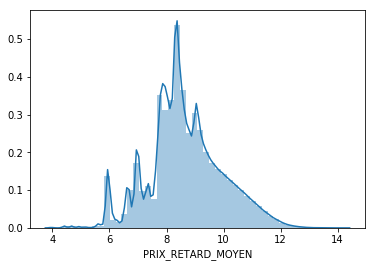

In [182]:
sns.distplot(np.log(full_join[full_join['PRIX_RETARD_MOYEN'].notna() & (full_join['PRIX_RETARD_MOYEN'] > 0)]['PRIX_RETARD_MOYEN']))

Moyenne du prix des retards à l'arrivé :  5113 $
              ARRIVEE_PRIX_RETARD_10
ARRIVEE_PAYS                        
LY                             105.0
MU                             160.0
LR                             307.0
SG                             553.0
NE                             610.0
              ARRIVEE_PRIX_RETARD_10
ARRIVEE_PAYS                        
MY                            9773.0
UG                            9744.0
MA                            9420.0
SC                            9364.0
HU                            9319.0


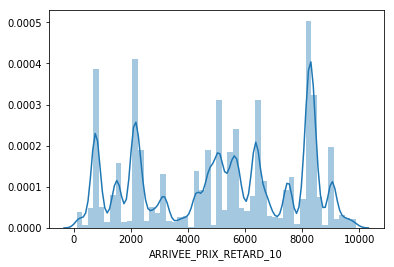

In [38]:
# Prix retard à l'arrivé par PAYS (DEPART_PRIX_RETARD_10 ~ ARRIVEE_PRIX_RETARD_10)
print("Moyenne du prix des retards à l'arrivé : ",int(full_join['ARRIVEE_PRIX_RETARD_10'].mean()),"$")
sns.distplot(full_join['ARRIVEE_PRIX_RETARD_10'])
print(full_join[['ARRIVEE_PAYS','ARRIVEE_PRIX_RETARD_10']].groupby('ARRIVEE_PAYS').mean().sort_values(by='ARRIVEE_PRIX_RETARD_10').head(5))
print(full_join[['ARRIVEE_PAYS','ARRIVEE_PRIX_RETARD_10']].groupby('ARRIVEE_PAYS').mean().sort_values(by='ARRIVEE_PRIX_RETARD_10',ascending=False).head(5))
# full_join['AEROPORT_DEPART'].value_counts()
# full_join['AEROPORT_ARRIVEE'].value_counts()

In [137]:
# Prix retard à l'arrivé par Aeroport (DEPART_PRIX_RETARD_10 ~ ARRIVEE_PRIX_RETARD_10)
print("Moyenne du prix des retards à l'arrivé : ",int(full_join['ARRIVEE_PRIX_RETARD_10'].mean()),"$")
print(full_join[['AEROPORT_DEPART','DEPART_PRIX_RETARD_10']].groupby('AEROPORT_DEPART').mean().sort_values(by='DEPART_PRIX_RETARD_10').head(5))
print(full_join[['AEROPORT_DEPART','DEPART_PRIX_RETARD_10']].groupby('AEROPORT_DEPART').mean().sort_values(by='DEPART_PRIX_RETARD_10',ascending=False).head(5))

Moyenne du prix des retards à l'arrivé :  5113 $
                 DEPART_PRIX_RETARD_10
AEROPORT_DEPART                       
TIP                                105
MRU                                160
GOA                                166
VAR                                174
BGW                                214
                 DEPART_PRIX_RETARD_10
AEROPORT_DEPART                       
TSF                               9877
KUL                               9773
KBP                               9757
HGH                               9753
EBB                               9744


,PRIX_RETARD_DEPART,TEMPS_RETARD_DEPART
AEROPORT_DEPART,,
SIP,19511.162791,25.953488
ZRH,17978.813333,28.900000
OTP,15768.574766,12.070093
LYS,15317.341772,17.871116
CJJ,15121.744954,11.416514


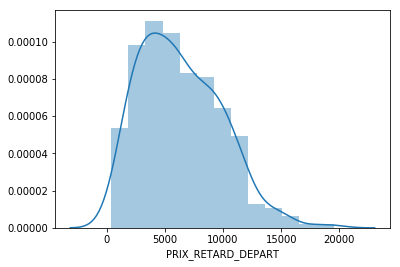

In [166]:
sns.distplot(full_join[['AEROPORT_DEPART','PRIX_RETARD_DEPART']].groupby('AEROPORT_DEPART').mean()['PRIX_RETARD_DEPART'])
full_join[['AEROPORT_DEPART','PRIX_RETARD_DEPART', 'TEMPS_RETARD_DEPART']].groupby('AEROPORT_DEPART').mean().sort_values(by='PRIX_RETARD_DEPART',ascending=False).head(5)
# 

## PRIX RETARD DEPART par AEROPORT

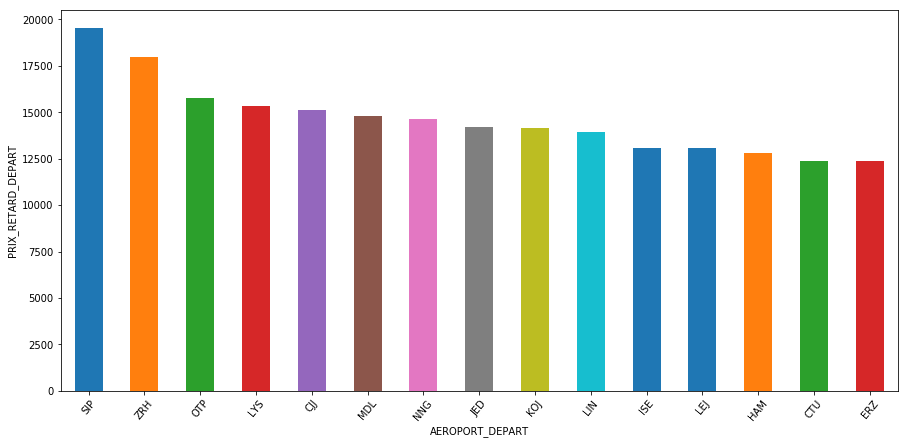

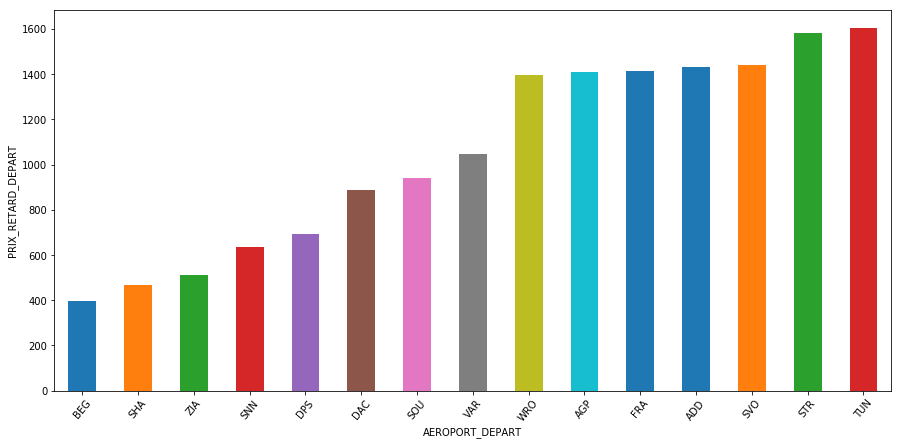

AEROPORT_DEPART
SIP    19511.162791
ZRH    17978.813333
OTP    15768.574766
LYS    15317.341772
CJJ    15121.744954
MDL    14795.453659
NNG    14638.756726
JED    14187.062158
KOJ    14126.254616
LIN    13926.967359
ISE    13086.735912
LEJ    13065.125000
HAM    12786.912064
CTU    12379.627406
ERZ    12361.905263
Name: PRIX_RETARD_DEPART, dtype: float64

In [265]:
plt.figure(figsize=(15,7))
#RETARD_DEPART.groupby('AEROPORT_DEPART').mean().sort_values(by='PRIX_RETARD_DEPART',ascending=False).head(5).plot.bar()
RETARD_DEPART_top_15 = full_join[['AEROPORT_DEPART','PRIX_RETARD_DEPART']].groupby('AEROPORT_DEPART').mean()['PRIX_RETARD_DEPART'].sort_values(ascending=False).head(15)
RETARD_DEPART_top_15.plot.bar()
plt.xticks(rotation=50)
# plt.xlabel("Country of Origin")
plt.ylabel("PRIX_RETARD_DEPART")
plt.show()
RETARD_DEPART_bottom_15 = full_join[['AEROPORT_DEPART','PRIX_RETARD_DEPART']].groupby('AEROPORT_DEPART').mean()['PRIX_RETARD_DEPART'].sort_values().head(15)
plt.figure(figsize=(15,7))
RETARD_DEPART_bottom_15.plot.bar()
plt.xticks(rotation=50)
plt.ylabel("PRIX_RETARD_DEPART")
plt.show()

# plt.xlabel("Country of Origin")
RETARD_DEPART_top_15

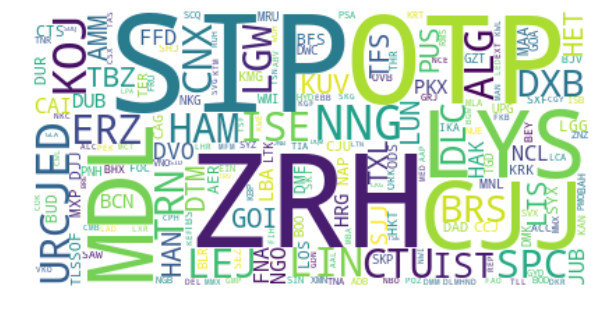

In [263]:
# Ceux qui paient le plus :
raw_text = full_join[['AEROPORT_DEPART','PRIX_RETARD_DEPART']].groupby('AEROPORT_DEPART').mean()['PRIX_RETARD_DEPART'].sort_values(ascending=False).reset_index().apply(lambda row : (str(row.AEROPORT_DEPART)+' ') * int(row.PRIX_RETARD_DEPART), axis=1)
text = " ".join(code for code in raw_text)
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white",collocations=False).generate(text)
# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## PRIX RETARD ARRIVEE par AEROPORT

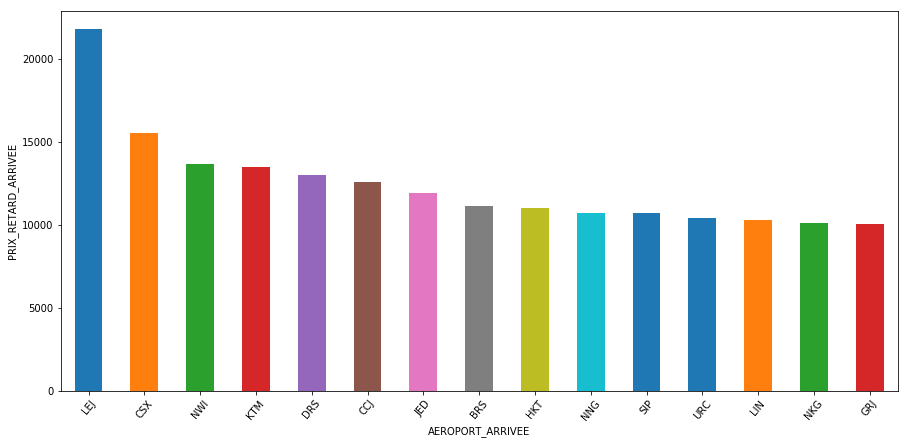

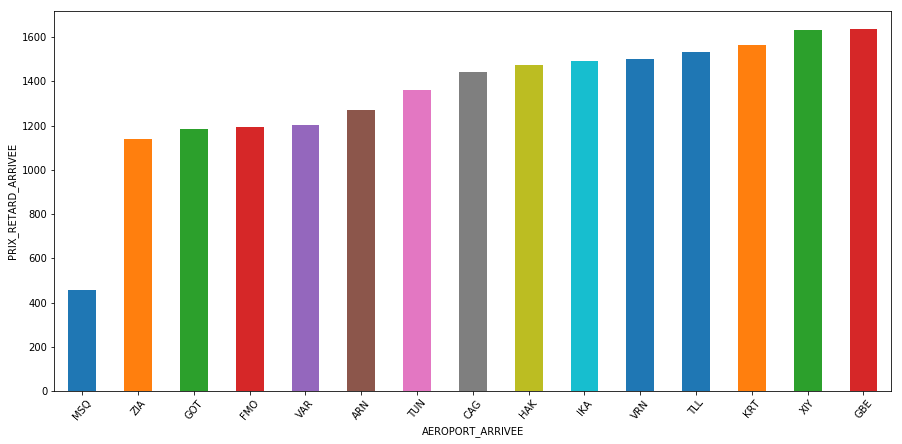

In [147]:
plt.figure(figsize=(15,7))
#RETARD_DEPART.groupby('AEROPORT_DEPART').mean().sort_values(by='PRIX_RETARD_DEPART',ascending=False).head(5).plot.bar()
RETARD_DEPART_top_15 = full_join[['AEROPORT_ARRIVEE','PRIX_RETARD_ARRIVEE']].groupby('AEROPORT_ARRIVEE').mean()['PRIX_RETARD_ARRIVEE'].sort_values(ascending=False).head(15)
RETARD_DEPART_top_15.plot.bar()
plt.xticks(rotation=50)
# plt.xlabel("Country of Origin")
plt.ylabel("PRIX_RETARD_ARRIVEE")
plt.show()
RETARD_DEPART_bottom_15 = full_join[['AEROPORT_ARRIVEE','PRIX_RETARD_ARRIVEE']].groupby('AEROPORT_ARRIVEE').mean()['PRIX_RETARD_ARRIVEE'].sort_values().head(15)
plt.figure(figsize=(15,7))
RETARD_DEPART_bottom_15.plot.bar()
plt.xticks(rotation=50)
plt.ylabel("PRIX_RETARD_ARRIVEE")
plt.show()

# plt.xlabel("Country of Origin")


## Correlation sur les retards :
- Les temps de deplécement on t il un impacte sur les retards ? 
- Les prix des amandes sont il lié aux temps retards ou prix du retard

Detecter des bootleneck (heures/ airport )

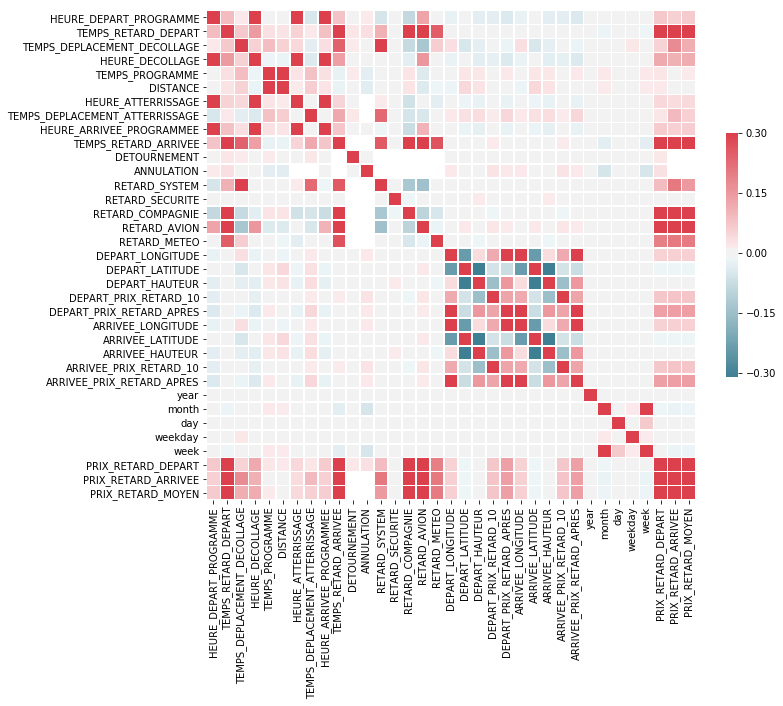

In [204]:
corr = full_join[[
    #'IDENTIFIANT', 'VOL', 
    #'AEROPORT_DEPART','AEROPORT_ARRIVEE',
    'HEURE_DEPART_PROGRAMME',#'HEURE_DEPART',
    'TEMPS_RETARD_DEPART',
    'TEMPS_DEPLACEMENT_DECOLLAGE', 'HEURE_DECOLLAGE',
    'TEMPS_PROGRAMME', #'TEMPS_PASSE', 'TEMPS_VOL',
    'DISTANCE',
    'HEURE_ATTERRISSAGE', 'TEMPS_DEPLACEMENT_ATTERRISSAGE',
    'HEURE_ARRIVEE_PROGRAMMEE',#'HEURE_ARRIVEE',
    'TEMPS_RETARD_ARRIVEE',
    'DETOURNEMENT', 'ANNULATION','RAISON_ANNULATION',
    'RETARD_SYSTEM','RETARD_SECURITE', 'RETARD_COMPAGNIE', 'RETARD_AVION', 'RETARD_METEO',
    'COMPAGNIE_CODE', 'COMPAGNIE',
    'DEPART_NOM', 'DEPART_LIEU', 'DEPART_PAYS',
    'DEPART_LONGITUDE', 'DEPART_LATITUDE', 'DEPART_HAUTEUR',
    'DEPART_PRIX_RETARD_10', 'DEPART_PRIX_RETARD_APRES',
    'ARRIVEE_NOM', 'ARRIVEE_LIEU', 'ARRIVEE_PAYS',
    'ARRIVEE_LONGITUDE','ARRIVEE_LATITUDE', 'ARRIVEE_HAUTEUR',
    'ARRIVEE_PRIX_RETARD_10', 'ARRIVEE_PRIX_RETARD_APRES',
    'year', 'month', 'day', 'weekday', 'week',
    'PRIX_RETARD_DEPART','PRIX_RETARD_ARRIVEE',
    'PRIX_RETARD_MOYEN'
]].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
Zomm sur les COMPAGNIE ! 

In [155]:
full_join.head(1)

,IDENTIFIANT,VOL,CODE_AVION,AEROPORT_DEPART,AEROPORT_ARRIVEE,HEURE_DEPART_PROGRAMME,HEURE_DEPART,TEMPS_RETARD_DEPART,TEMPS_DEPLACEMENT_DECOLLAGE,HEURE_DECOLLAGE,TEMPS_PROGRAMME,TEMPS_PASSE,TEMPS_VOL,DISTANCE,HEURE_ATTERRISSAGE,TEMPS_DEPLACEMENT_ATTERRISSAGE,HEURE_ARRIVEE_PROGRAMMEE,HEURE_ARRIVEE,TEMPS_RETARD_ARRIVEE,DETOURNEMENT,ANNULATION,RAISON_ANNULATION,RETARD_SYSTEM,RETARD_SECURITE,RETARD_COMPAGNIE,RETARD_AVION,RETARD_METEO,NIVEAU_SECURITE,COMPAGNIE_CODE,COMPAGNIE,DEPART_NOM,DEPART_LIEU,DEPART_PAYS,DEPART_LONGITUDE,DEPART_LATITUDE,DEPART_HAUTEUR,DEPART_PRIX_RETARD_10,DEPART_PRIX_RETARD_APRES,ARRIVEE_NOM,ARRIVEE_LIEU,ARRIVEE_PAYS,ARRIVEE_LONGITUDE,ARRIVEE_LATITUDE,ARRIVEE_HAUTEUR,ARRIVEE_PRIX_RETARD_10,ARRIVEE_PRIX_RETARD_APRES,year,month,day,weekday,week,PRIX_RETARD_DEPART,PRIX_RETARD_ARRIVE,PRIX_RETARD_ARRIVEE
0,651373,2317,28fa5df4d7,TIA,DSS,1410,1411.0,1.0,20.0,1431.0,229.0,227.0,197.0,1749,2048.0,10.0,2059,2058.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,10,NVPPA,Ne Va Pas Partout Airlines,Tirana International Airport Mother Teresa,Tirana,AL,19.7206,41.4147,126.0,4582,586,Tirana International Airport Mother Teresa,Tirana,AL,19.7206,41.4147,126.0,4582,586,2016,4,10,6,14,4582.0,0.0,0.0
